# Boston House Dataset - Using Linear Regression Model

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. We are using the Boston Housing dataset which contains information about different houses. There are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.


# Import the Python Libraries

In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To plot the graph embedded in the notebook
%matplotlib inline

# To Plot Pandas Profiling to give summary view of the entire dataset
import pandas_profiling  #- no module error
from pandas_profiling import ProfileReport

import os

#imports from sklearn library
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Loading the Dataset

In [9]:
df_boston = pd.read_csv("Boston_Housing_Datasets.csv")

In [10]:
df_boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
# To remove the "Unnamed:0" column in the DataFrame or Table, I added index_col=0 to the load dataset code

df_boston = pd.read_csv("Boston_Housing_Datasets.csv", index_col=0)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
# Perform Exploratory Data Analysis in just one line of code

pandas_profiling.ProfileReport(pd.read_csv("Boston_Housing_Datasets.csv"))

In [13]:
# This shows the categories of Pandas either Series and DataFrame

type(df_boston)

pandas.core.frame.DataFrame

In [14]:
# To view the name of the columns in the dataset
df_boston.keys()

Index(['CRIM', 'ZN', ' INDUS', 'CHAS', 'NOX', 'RM', ' AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
# Shape attribute returns the number of rows and columns in the dataset
df_boston.shape

(506, 14)

In [16]:
# This provides the statistical value of the dataset within the DataFrame
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# To get information about the dataset
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2    INDUS   506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6    AGE     506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [18]:
# To view the name of the columns in the dataset

df_boston.columns

Index(['CRIM', 'ZN', ' INDUS', 'CHAS', 'NOX', 'RM', ' AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MEDV'],
      dtype='object')

In [19]:
# Shows the last five rows of the dataset
df_boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [20]:
# Shows the first five rows of the dataset
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Checking for Missing Values 

In [21]:
# checking for missing values
df_boston.isnull().sum()

CRIM       0
ZN         0
 INDUS     0
CHAS       0
NOX        0
RM         0
 AGE       0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
# no missing value found in the dataset

In [23]:
# Provides the statistical values of the dataset, this will show if the dataset is well standardized or varies in magnitude
print(df_boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       BLACK  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Exploratory Data Analysis 
Exploratory Data Analysis is a very important step before training the model. Here, we will use visualizations to understand the relationship of the target variable with other features.

To see the distribution of Target Variable "MEDV", we will plot the distribution of the "MEDV" column using "distplot" function from "seaborn" library in Python.

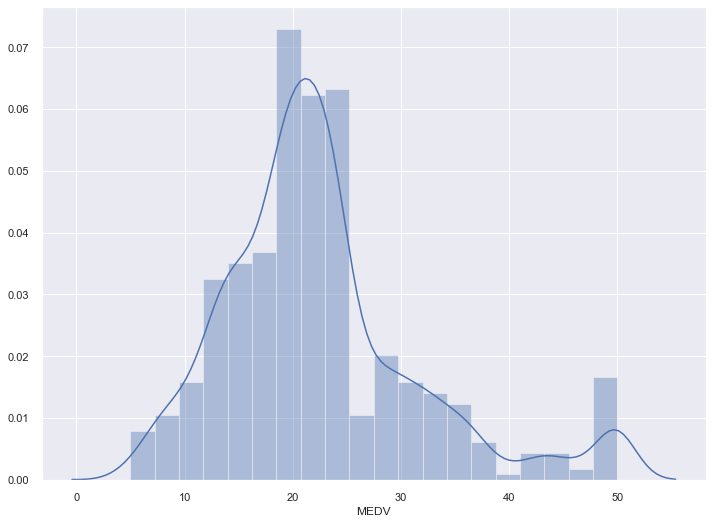

In [24]:
sns.set(rc={'figure.figsize':(11.9,8.7)})
sns.distplot(df_boston['MEDV'], bins=20)
plt.show()

The distribution of the Target Variable "medv" can also be plot using the histogram plot function from the matplotlib library.

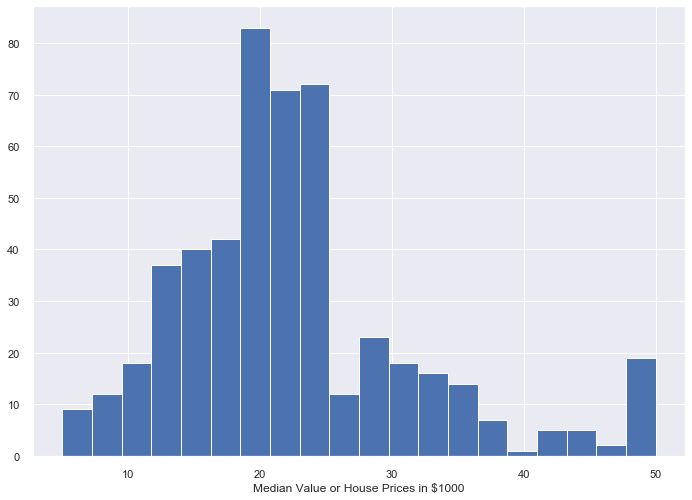

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df_boston['MEDV'], bins=20)
plt.xlabel("Median Value or House Prices in $1000")
plt.show()

Based on the distribution plot above, it shows that "Medv" or the median value/House Prices within the Boston MA are well distributed normally with few outliers. most of the house are around 20 - 24 range (in $1000 scale).



# Visualizing the Relationship Between The Variables/Features
We will now visualize the pairplot which shows the relationships between all the features present in the dataset.

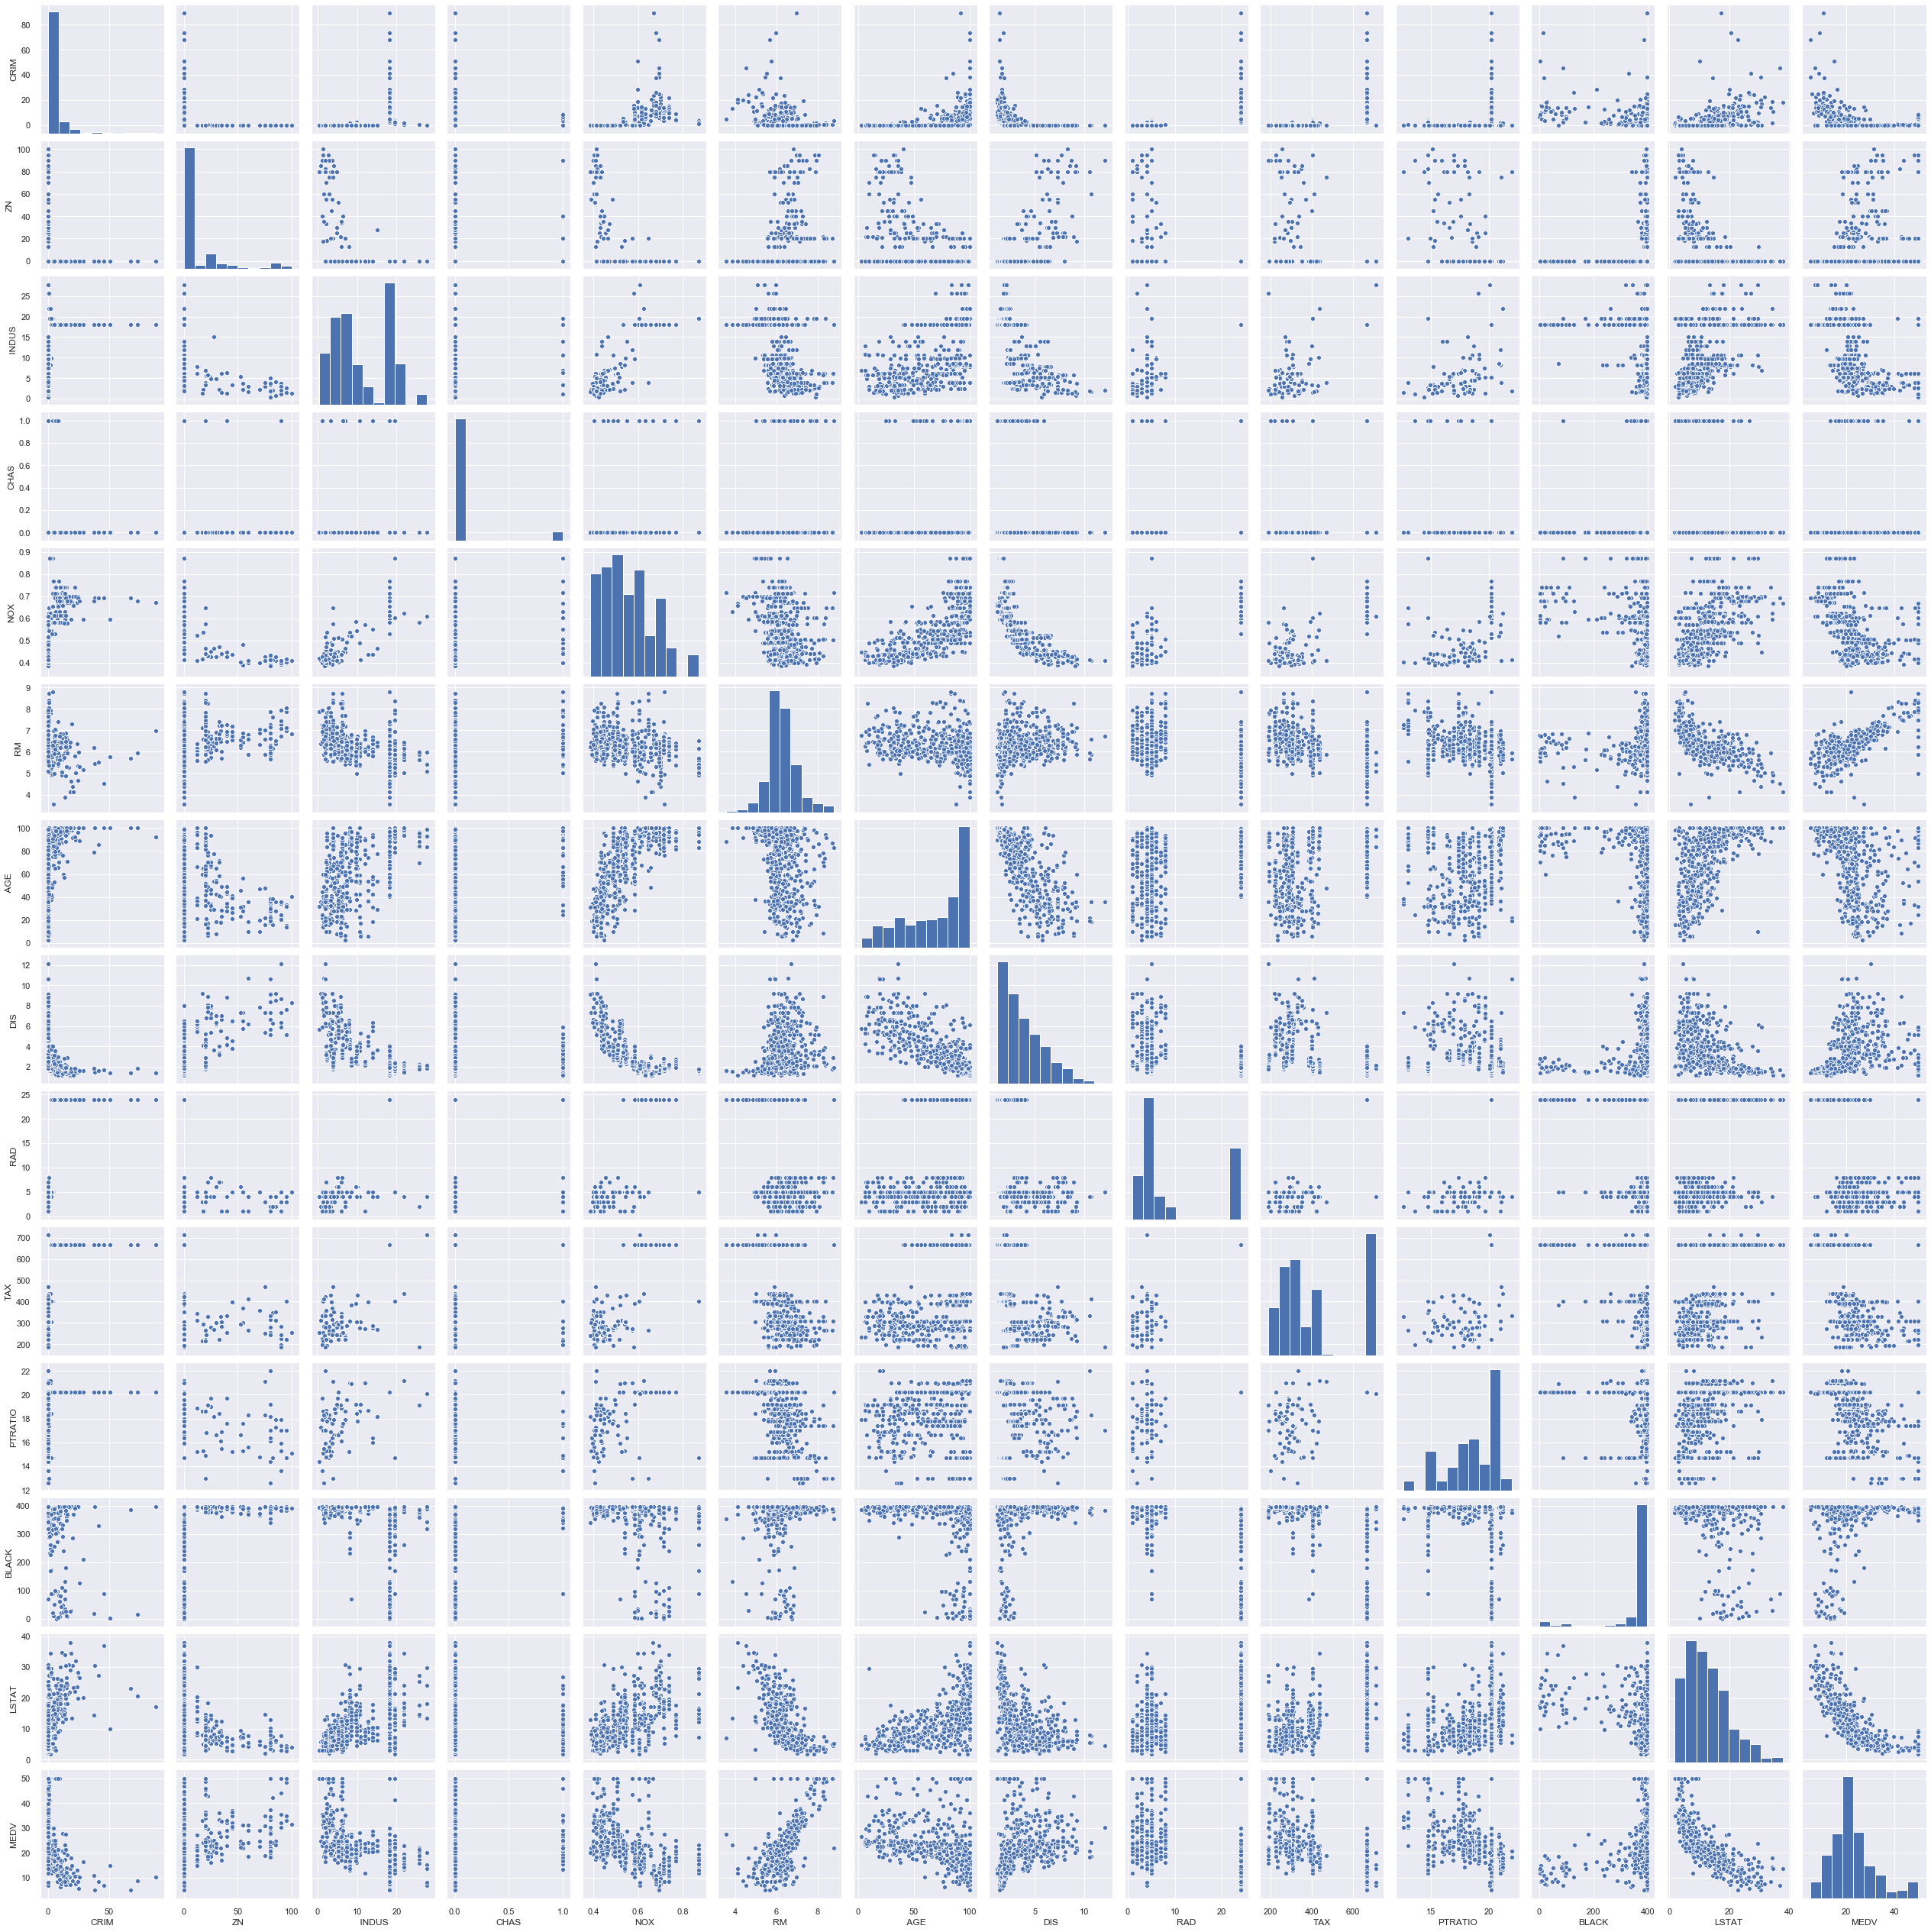

In [26]:
# Visualizing the Relationship between all variables 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(df_boston)
plt.show()

# Plot the Correlation Matrix to Show the Linear Relationship Between Variables

To check the linear relationships between all the Variables, we need to plot the "Correlation Matrix". The correlation matrix can be done by using the "corr function" from the pandas dataframe library. We will use the "Heatmap Function" from the seaborn library to plot the correlation matrix.

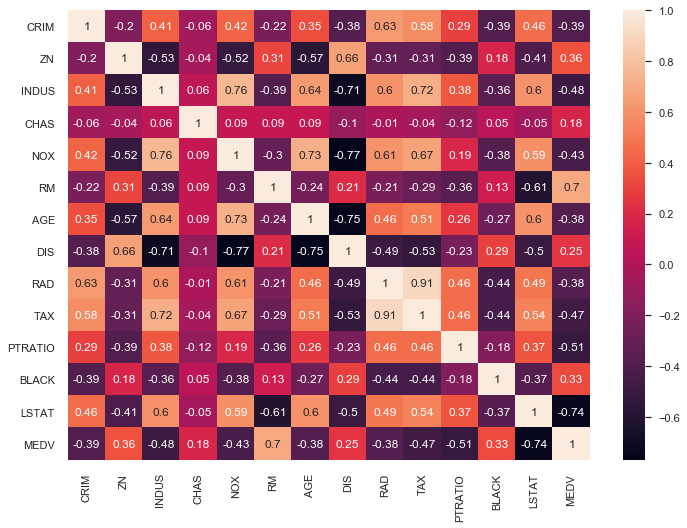

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = df_boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

# Observation from the Correlation Plot Diagram Above

From the above two graphs, we can clearly see that the feature RM has a positive correlation with MEDV.

- To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

- An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD,  TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.


# Visualizing linear relationships in Linear Regression using Seaborn

Functions to draw linear regression models

- Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

- In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

Source: https://seaborn.pydata.org/tutorial/regression.html

Based on the above observations, "RM has a strong relationship with the Target variable "MEDV". Therefore, Implot function in seaborn library of python will be used to plot the linear relationship between RM and MEDV.

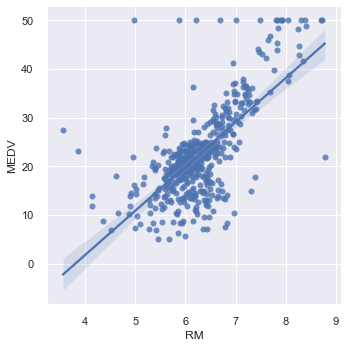

In [28]:
sns.set(rc={'figure.figsize':(22.7,15.40)})
sns.lmplot(x = 'RM', y = 'MEDV', data = df_boston)
plt.show()

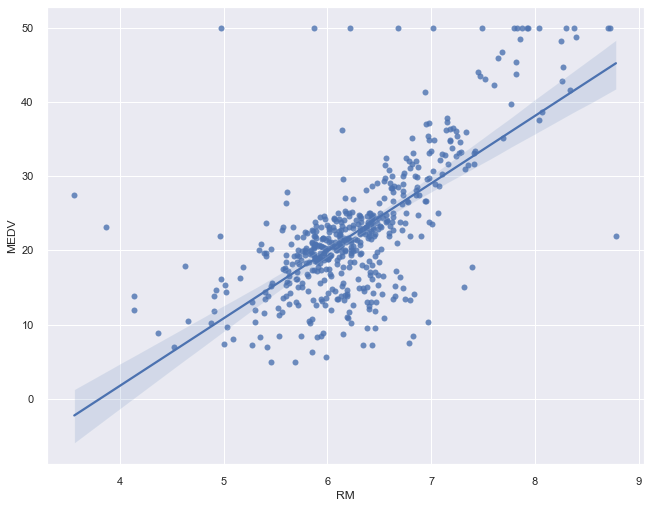

In [29]:
# Also using the "regplot" function of seaborn to plot the linear relationship

sns.set(rc={'figure.figsize':(10.7,8.40)})
sns.regplot(x="RM", y="MEDV", data=df_boston)


Both "implot" and "regplot" function shows that there is a linear relationship that exist between "RM" and "MEDV" variables or features 

Also, based on the correlation matrix, the RM found to have a strong positive correlation with target variable "MEDV" at (0.7) and  variable "LSTAT" found to have a high negative correlation with "MEDV" at (-0.74). We will use scatter plot in matplotlib.pyplot library in Python see how these two variables/feautures vary with the Target feature "MEDV".

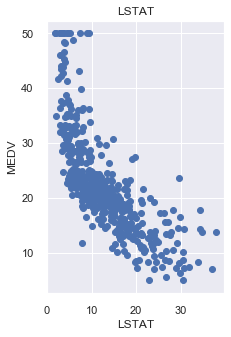

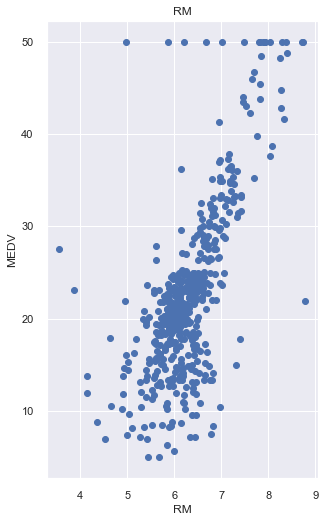

In [30]:
plt.figure(figsize=(7, 5))

features = ['LSTAT', 'RM']
target = df_boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

Notice

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

# Splitting the data into Training and Test Data

Since you saw that ‘RM’ shows positive correlation with the 'MEDV" which show the house prices, we will use this variable

We will now split the dataset into training and test data. We do this to train our model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data

We are using the train_test_split function from the sklearn library to split the data.



In [31]:
# To list the number of features in the dataset
df_boston.columns

Index(['CRIM', 'ZN', ' INDUS', 'CHAS', 'NOX', 'RM', ' AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MEDV'],
      dtype='object')

In [32]:
# To define the target features and the predictors features
X = df_boston[['CRIM', 'ZN', ' INDUS', 'CHAS', 'NOX', 'RM', ' AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT']]
y = df_boston['MEDV']

X is the independent variable and y is the dependent variable.

In [33]:
# Train_Test_Split library in sklearn
from sklearn.model_selection import train_test_split

# Splitting the dataset to 20% test (i.e test size of 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# We finally print the shapes of our training and test set to verify if the splitting has occurred properly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


The train has the output of [404,13] and test data is of the size [102,13].

# Training the Model

We will now train our model using the LinearRegression function from the sklearn library.

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Making Prediction on the Model

We will now make prediction on the test data using the LinearRegression function and plot a scatterplot between the test data and the predicted value.

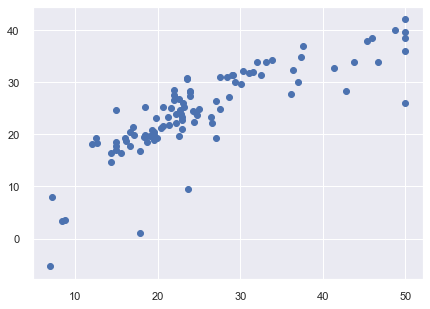

In [35]:
plt.figure(figsize=(7, 5))

y_train_prediction = lm.predict(X_test)
plt.scatter(y_test, y_train_prediction)

Plotting the data frame for the actual and predicted value and plotting a graph for the same.

In [36]:
df_boston_1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_train_prediction})
df_boston_2 = df_boston_1.head(15)
df_boston_2

,Actual,Predicted
306,28.4,31.078964
194,31.1,31.721694
66,23.5,30.873149
350,26.6,22.282350
152,19.6,18.856061
434,14.3,16.471325
162,50.0,36.050042
130,14.3,14.640323
270,20.7,25.240786
227,37.6,36.920739


# To Check if the Model Predict Well using both "Actual" and "Predicted"

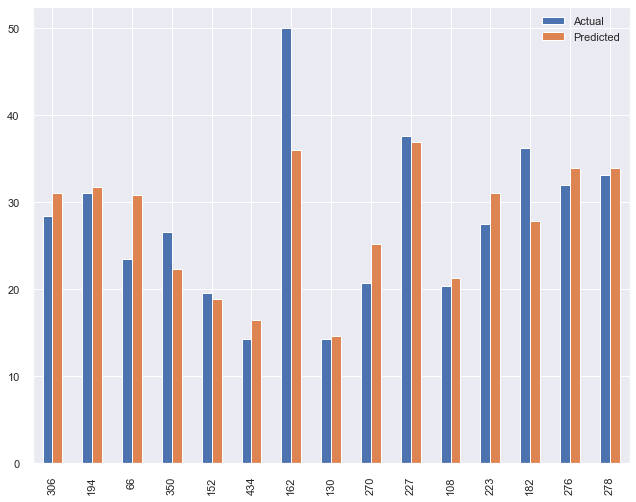

In [37]:
df_boston_2.plot(kind = 'bar')

From the above graph, we can see that there is not much difference between the actual and predicted values,  Hence our predicted model seems to work pretty well.

# Model Evaluation

We will now evaluate the model using the metrics and r2_score function from sklearn library.

Here we will evaluate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R-squared value.

The value of R-square ranges from 0 to 1 where value ‘1’ ( or near to 1) indicates predictor perfectly accounts for all the variation in Y.

In [38]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test, y_train_prediction))
print('MSE', metrics.mean_squared_error(y_test, y_train_prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_train_prediction)))
print('R squared error', r2_score(y_test, y_train_prediction))


MAE 4.061419182954706
MSE 34.4139684531385
RMSE 5.8663419993330175
R squared error 0.6709339839115634


The R squared value is moderately nearer to the value 1 which seems to be a good start. However, the model performance can be increased by adjusting some parameters.  

Sources of the Tutorials:
https://acadgild.com/blog/linear-regression-on-boston-housing-data

https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155